In [78]:
import pandas as pd
import numpy as np

# 가상 데이터 생성
data = {
    'TransactionID': range(1, 21),
    'CustomerID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'PurchaseAmount': [250, -50, 3000000, 450, 0, 300, 200, 150, -10, 800, 50, 75, 400, np.nan, 600, 1000, 20, 5000, 150, 80],
    'PurchaseDate': pd.date_range(start='2024-01-01', periods=20, freq='ME').tolist(),
    'ProductCategory': ['Electronics', 'Clothing', 'Electronics', 'Home', 'Electronics', 'Home', 'Clothing', 'Home', 'Clothing', 'Electronics', 'Electronics', 'Home', 'Clothing', 'Electronics', 'Home', 'Home', 'Clothing', 'Electronics', 'Home', 'Electronics'],
    'CustomerAge': [25, 35, 45, np.nan, 22, 29, 33, 41, 27, 36, 28, 34, 42, 39, 24, 30, 32, 40, 38, 26],
    'CustomerGender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'ReviewScore': [5, np.nan, 4, 3, 2, 5, 3, 4, 1, 2, np.nan, 4, 5, 3, 4, np.nan, 1, 5, 2, 4]
}

df = pd.DataFrame(data)
df


,TransactionID,CustomerID,PurchaseAmount,PurchaseDate,ProductCategory,CustomerAge,CustomerGender,ReviewScore
0,1,101,250.0,2024-01-31,Electronics,25.0,Male,5.0
1,2,102,-50.0,2024-02-29,Clothing,35.0,Female,NaN
2,3,103,3000000.0,2024-03-31,Electronics,45.0,Female,4.0
3,4,104,450.0,2024-04-30,Home,NaN,Male,3.0
4,5,105,0.0,2024-05-31,Electronics,22.0,Female,2.0
5,6,106,300.0,2024-06-30,Home,29.0,Male,5.0
6,7,107,200.0,2024-07-31,Clothing,33.0,Female,3.0
7,8,108,150.0,2024-08-31,Home,41.0,NaN,4.0
8,9,109,-10.0,2024-09-30,Clothing,27.0,Male,1.0
9,10,110,800.0,2024-10-31,Electronics,36.0,Female,2.0


In [79]:
# IQR 방법을 사용하여 이상치 식별 및 처리
Q1 = df['PurchaseAmount'].quantile(0.25)
Q3 = df['PurchaseAmount'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 범위 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 식별
outliers = df[(df['PurchaseAmount'] < lower_bound) | (df['PurchaseAmount'] > upper_bound)]

# 이상치 처리: 이상치, 음수 값, 0 값을 NaN으로 대체
df['PurchaseAmount'] = df['PurchaseAmount'].apply(lambda x: np.nan if x < lower_bound or x > upper_bound or x <= 0 else x)

# NaN 값을 중앙값으로 대체
df['PurchaseAmount'] = df['PurchaseAmount'].fillna(df['PurchaseAmount'].median())

# CustomerAge 결측값을 중앙값으로 대체
df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].median())

# ReviewScore 결측값을 평균값으로 대체
df['ReviewScore'] = df['ReviewScore'].fillna(df['ReviewScore'].mean())

df

,TransactionID,CustomerID,PurchaseAmount,PurchaseDate,ProductCategory,CustomerAge,CustomerGender,ReviewScore
0,1,101,250.0,2024-01-31,Electronics,25.0,Male,5.000000
1,2,102,225.0,2024-02-29,Clothing,35.0,Female,3.352941
2,3,103,225.0,2024-03-31,Electronics,45.0,Female,4.000000
3,4,104,450.0,2024-04-30,Home,33.0,Male,3.000000
4,5,105,225.0,2024-05-31,Electronics,22.0,Female,2.000000
5,6,106,300.0,2024-06-30,Home,29.0,Male,5.000000
6,7,107,200.0,2024-07-31,Clothing,33.0,Female,3.000000
7,8,108,150.0,2024-08-31,Home,41.0,NaN,4.000000
8,9,109,225.0,2024-09-30,Clothing,27.0,Male,1.000000
9,10,110,800.0,2024-10-31,Electronics,36.0,Female,2.000000


In [80]:
# CustomerGender 열을 원-핫 인코딩
df = pd.get_dummies(df, columns=['CustomerGender'], drop_first=True)

df

,TransactionID,CustomerID,PurchaseAmount,PurchaseDate,ProductCategory,CustomerAge,ReviewScore,CustomerGender_Male
0,1,101,250.0,2024-01-31,Electronics,25.0,5.000000,True
1,2,102,225.0,2024-02-29,Clothing,35.0,3.352941,False
2,3,103,225.0,2024-03-31,Electronics,45.0,4.000000,False
3,4,104,450.0,2024-04-30,Home,33.0,3.000000,True
4,5,105,225.0,2024-05-31,Electronics,22.0,2.000000,False
5,6,106,300.0,2024-06-30,Home,29.0,5.000000,True
6,7,107,200.0,2024-07-31,Clothing,33.0,3.000000,False
7,8,108,150.0,2024-08-31,Home,41.0,4.000000,False
8,9,109,225.0,2024-09-30,Clothing,27.0,1.000000,True
9,10,110,800.0,2024-10-31,Electronics,36.0,2.000000,False


In [81]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionID        20 non-null     int64         
 1   CustomerID           20 non-null     int64         
 2   PurchaseAmount       20 non-null     float64       
 3   PurchaseDate         20 non-null     datetime64[ns]
 4   ProductCategory      20 non-null     object        
 5   CustomerAge          20 non-null     float64       
 6   ReviewScore          20 non-null     float64       
 7   CustomerGender_Male  20 non-null     bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 1.2+ KB


In [82]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# PurchaseAmount 열 정규화
df['PurchaseAmount'] = scaler.fit_transform(df[['PurchaseAmount']])

df

,TransactionID,CustomerID,PurchaseAmount,PurchaseDate,ProductCategory,CustomerAge,ReviewScore,CustomerGender_Male
0,1,101,0.234694,2024-01-31,Electronics,25.0,5.000000,True
1,2,102,0.209184,2024-02-29,Clothing,35.0,3.352941,False
2,3,103,0.209184,2024-03-31,Electronics,45.0,4.000000,False
3,4,104,0.438776,2024-04-30,Home,33.0,3.000000,True
4,5,105,0.209184,2024-05-31,Electronics,22.0,2.000000,False
5,6,106,0.285714,2024-06-30,Home,29.0,5.000000,True
6,7,107,0.183673,2024-07-31,Clothing,33.0,3.000000,False
7,8,108,0.132653,2024-08-31,Home,41.0,4.000000,False
8,9,109,0.209184,2024-09-30,Clothing,27.0,1.000000,True
9,10,110,0.795918,2024-10-31,Electronics,36.0,2.000000,False


In [ ]:
# ProductCategory 열을 원-핫 인코딩
df = pd.get_dummies(df, columns=['ProductCategory'], drop_first=True)

In [83]:
df.sample(n=5, random_state=42)

,TransactionID,CustomerID,PurchaseAmount,PurchaseDate,ProductCategory,CustomerAge,ReviewScore,CustomerGender_Male
0,1,101,0.234694,2024-01-31,Electronics,25.0,5.000000,True
17,18,108,0.209184,2025-06-30,Electronics,40.0,5.000000,False
15,16,106,1.000000,2025-04-30,Home,30.0,3.352941,False
1,2,102,0.209184,2024-02-29,Clothing,35.0,3.352941,False
8,9,109,0.209184,2024-09-30,Clothing,27.0,1.000000,True


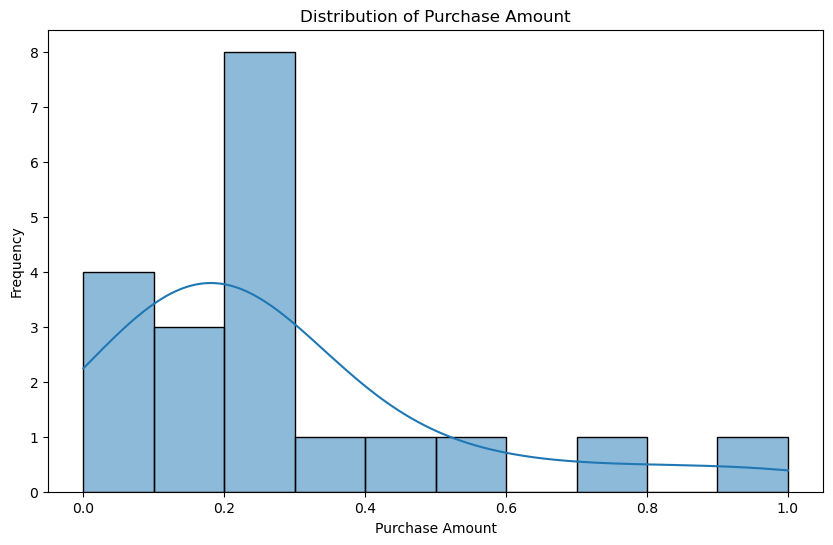

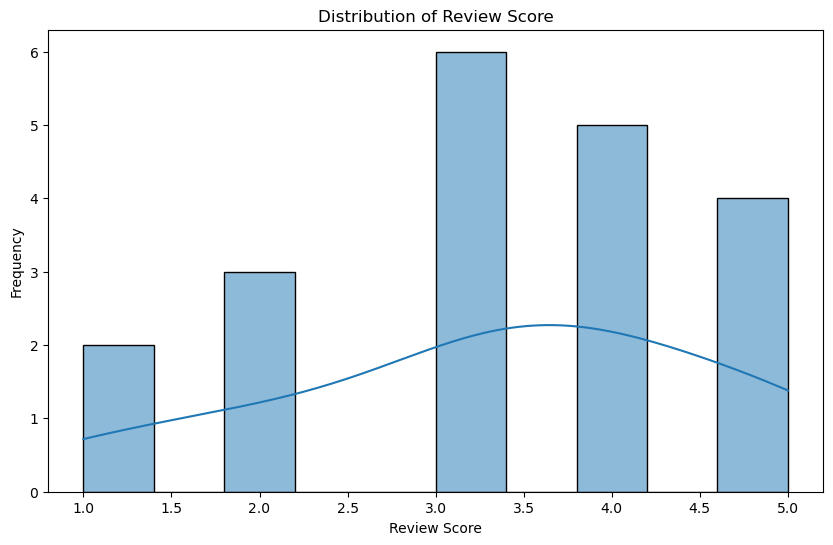

In [84]:
import seaborn as sns

import matplotlib.pyplot as plt

# PurchaseAmount 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['PurchaseAmount'], bins=10, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# ReviewScore 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['ReviewScore'], bins=10, kde=True)
plt.title('Distribution of Review Score')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()